In [61]:
# importing necessory packages for our task
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

#### data loading and filtering 

In [62]:
# data loading from csv file
data=pd.read_csv("car_ad.csv" ,encoding='latin-1')

In [63]:
# data and data types 
data.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [64]:
# droping price if it is zero
data.drop(data[data.price <= 0 ].index)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.50,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.80,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.50,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.80,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.00,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.00,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.50,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.80,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.20,Diesel,yes,2010,E-Class,rear


In [65]:
# finding number of droping price
data.price[data.price ==0].count()

267

In [66]:
data.head(3)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear


In [67]:
#Drop column where price is zero

df = data.drop(data[data.price == 0].index)

In [68]:
df.price[df.price == 0].count()

0

In [69]:
df.shape

(9309, 10)

#### All types of ploting gives basic understanding and analysis of data in more details 

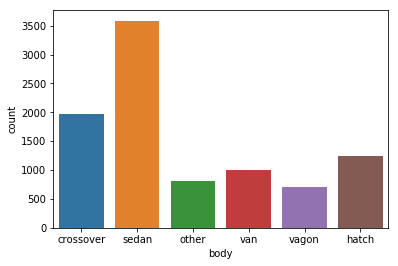

In [70]:
#visualize dataset
sns.countplot(df['body'])

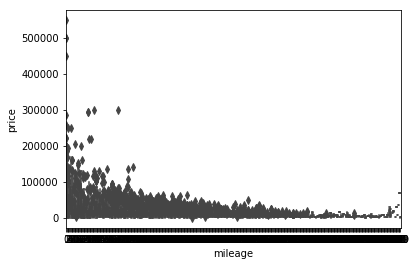

In [71]:
sns.boxplot(x='mileage',y='price',data=df)

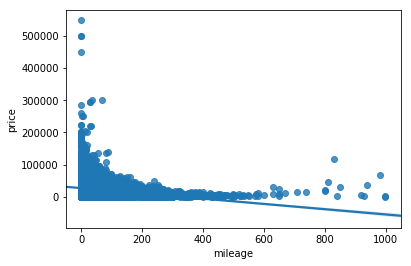

In [72]:
sns.regplot(x='mileage',y='price',data=df)

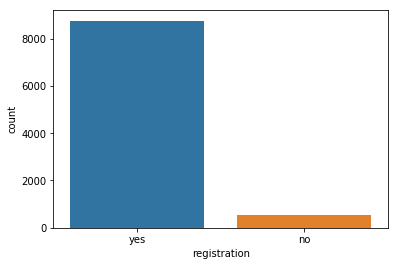

In [73]:
sns.countplot(df['registration'])

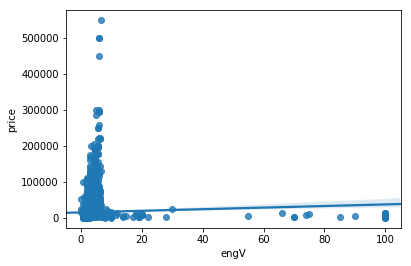

In [74]:
sns.regplot(x='engV',y='price',data=df)

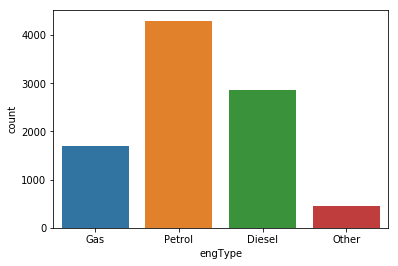

In [75]:
sns.countplot(df['engType'])

#### Applying one hot encoding for training and testing of data

In [77]:
#hot encode
from sklearn import model_selection, preprocessing
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        #x_train.drop(c,axis=1,inplace=True)

In [78]:
df.head(4)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,25,15500.0,0,68,2.5,1,1,2010,490,1
1,52,20500.0,3,173,1.8,1,1,2011,332,3
2,52,35000.0,2,135,5.5,3,1,2008,240,3
3,52,17800.0,5,162,1.8,0,1,2012,206,0


In [79]:
y_train = df["price"]
x_train = df.drop(["price"], axis=1)

In [80]:
data_train, data_test, label_train, label_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


In [81]:
x_train.head(4)

,car,body,mileage,engV,engType,registration,year,model,drive
0,25,0,68,2.5,1,1,2010,490,1
1,52,3,173,1.8,1,1,2011,332,3
2,52,2,135,5.5,3,1,2008,240,3
3,52,5,162,1.8,0,1,2012,206,0


In [82]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [83]:
df.price.skew()

7.1129147348625485

In [84]:
#with log transform
label_test_log=np.log(label_test)

In [85]:
label_train_log=np.log(label_train)

In [86]:
dtrain_log = xgb.DMatrix(data_train, label_train_log)

c:\users\shashank rocky\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [87]:
label_train1=np.log(label_train)

In [88]:
#with log
label_train_log.skew()

0.17376919751900072

In [89]:
dtrain = xgb.DMatrix(data_train, label_train)

In [90]:
#without log transform
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[0]	train-rmse:28470.5	test-rmse:28497.3
[50]	train-rmse:8718.58	test-rmse:11501.9
[100]	train-rmse:6181.02	test-rmse:10112.5
[150]	train-rmse:5152.93	test-rmse:9814.33
[200]	train-rmse:4522.52	test-rmse:9630.28
[250]	train-rmse:4066.2	test-rmse:9507.78
[300]	train-rmse:3728.99	test-rmse:9478.48
[350]	train-rmse:3463.35	test-rmse:9417.57
[400]	train-rmse:3254.29	test-rmse:9384.78
[450]	train-rmse:3090.45	test-rmse:9354.97
[500]	train-rmse:2944.46	test-rmse:9338.34


In [91]:
#with log transform
cv_output_log = xgb.cv(xgb_params, dtrain_log, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[0]	train-rmse:8.30206	test-rmse:8.30217
[50]	train-rmse:0.727991	test-rmse:0.737879
[100]	train-rmse:0.270051	test-rmse:0.308431
[150]	train-rmse:0.240175	test-rmse:0.288753
[200]	train-rmse:0.223705	test-rmse:0.280062
[250]	train-rmse:0.209423	test-rmse:0.273504
[300]	train-rmse:0.19704	test-rmse:0.269132
[350]	train-rmse:0.186978	test-rmse:0.265848
[400]	train-rmse:0.178197	test-rmse:0.263395
[450]	train-rmse:0.171102	test-rmse:0.261798
[500]	train-rmse:0.164361	test-rmse:0.260409
[550]	train-rmse:0.158097	test-rmse:0.259187
[600]	train-rmse:0.152741	test-rmse:0.258208
[650]	train-rmse:0.147813	test-rmse:0.257654
[700]	train-rmse:0.143014	test-rmse:0.257143
[750]	train-rmse:0.138762	test-rmse:0.256772


In [92]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 

num_boost_rounds)

[02:33:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
#with log transform
num_boost_rounds = len(cv_output)
model_log = xgb.train(dict(xgb_params, silent=0), dtrain_log, num_boost_round= 

num_boost_rounds)

[02:33:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


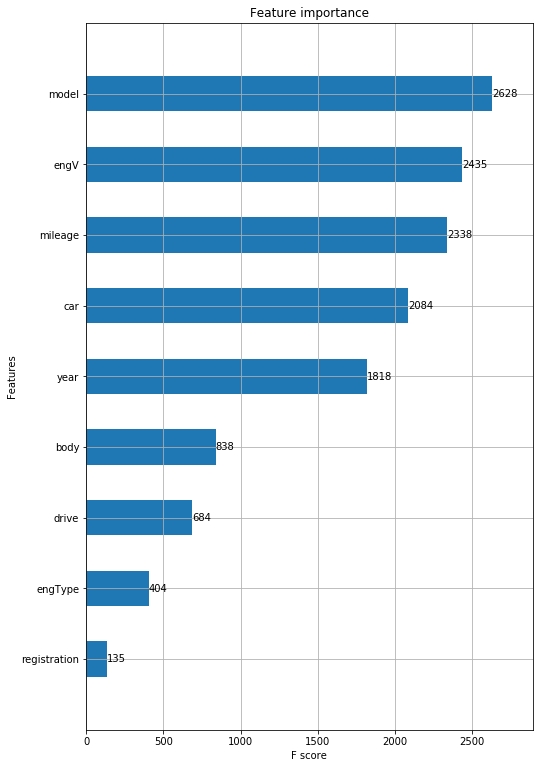

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [95]:

#without log transformation
dtest=xgb.DMatrix(data_test)

In [96]:
data_test.head(3)

,car,body,mileage,engV,engType,registration,year,model,drive
6154,52,2,210,4.30,1,1,2000,544,1
144,52,0,0,2.98,0,1,2016,405,1
3627,54,0,240,3.20,0,1,2006,605,1


In [97]:
#without log
y_predict = model.predict(dtest)
out = pd.DataFrame({'Actual_price': label_test, 'predict_price': y_predict,'Diff' :(label_test-y_predict)})
out[['Actual_price','predict_price','Diff']].head(5)

,Actual_price,predict_price,Diff
6154,8500.0,13046.121094,-4546.121094
144,109999.0,110140.687500,-141.687500
3627,14700.0,13647.515625,1052.484375
4541,12400.0,11256.895508,1143.104492
3200,10200.0,12748.213867,-2548.213867


In [98]:
#with log transformation
y_predict_log = model_log.predict(dtest)
y_predict_log=np.exp(y_predict_log)
out_log = pd.DataFrame({'Actual_price': label_test, 'predict_price': y_predict_log,'Diff' :(label_test-y_predict_log)})
out_log[['Actual_price','predict_price','Diff']].head(5)

,Actual_price,predict_price,Diff
6154,8500.0,9578.674805,-1078.674805
144,109999.0,114400.742188,-4401.742188
3627,14700.0,14456.292969,243.707031
4541,12400.0,11582.417969,817.582031
3200,10200.0,11654.828125,-1454.828125


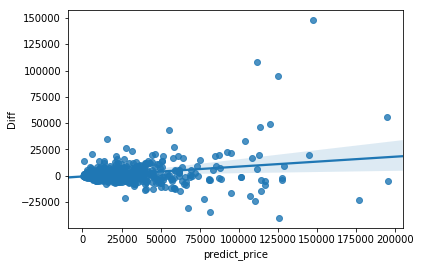

In [99]:
#log transformation
sns.regplot(out_log['predict_price'],out_log['Diff'])

In [100]:
out[['Actual_price','predict_price','Diff']].head(3)

,Actual_price,predict_price,Diff
6154,8500.0,13046.121094,-4546.121094
144,109999.0,110140.687500,-141.687500
3627,14700.0,13647.515625,1052.484375


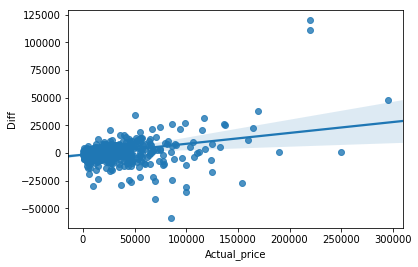

In [101]:
sns.regplot(out['Actual_price'],out['Diff'])

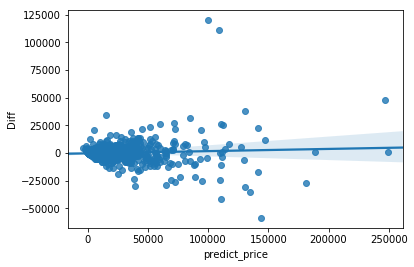

In [102]:
sns.regplot(out['predict_price'],out['Diff'])